In [4]:
!pip install tensorflow opencv-python matplotlib

In [5]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aext-assistant                4.0.15
aext-assistant-server         4.0.15
aext-core                     4.0.15
aext-core-server              4.0.15
aext-panels                   4.0.15
aext-panels-server            4.0.15
aext-share-notebook           4.0.15
aext-share-notebook-server    4.0.15
aext-shared                   4.0.15
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.5.0
anaconda-navigator            2.6.3
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
ar

In [4]:
import tensorflow as tf
import os

In [6]:
#Avoid OOM errors by setting GPU Memory Consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove Dodgy Images

In [8]:
import cv2
import imghdr
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13440\3336726459.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Load Data

Found 305 files belonging to 2 classes.


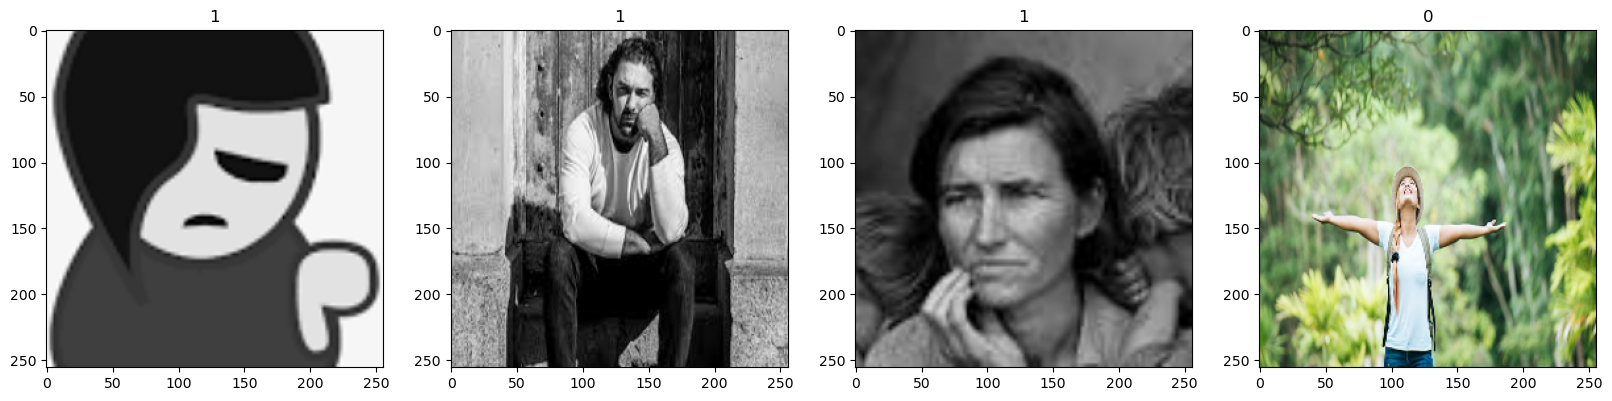

In [18]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('data')

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data

In [12]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          [8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          [8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          ...,
          [8.5490197e-01, 8.3137256e-01, 7.4509805e-01],
          [8.5490197e-01, 8.3137256e-01, 7.4509805e-01],
          [8.5490197e-01, 8.3137256e-01, 7.4509805e-01]],
 
         [[8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          [8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          [8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          ...,
          [8.5490197e-01, 8.3137256e-01, 7.4509805e-01],
          [8.5490197e-01, 8.3137256e-01, 7.4509805e-01],
          [8.5490197e-01, 8.3137256e-01, 7.4509805e-01]],
 
         [[8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          [8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          [8.2745099e-01, 7.8431374e-01, 6.5882355e-01],
          ...,
          [8.5490197e-01, 8.3137256e-01, 7.4509805e-01],
          [8.5490197e-01, 8.3137256e-

## Split Data

In [14]:
print(len(data))
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

10


In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building a Deep Learning Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 12s 874ms/step - loss: 0.7520 - accuracy: 0.6205 - val_loss: 0.6606 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 11s 1s/step - loss: 0.6380 - accuracy: 0.6071 - val_loss: 0.5359 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.5486 - accuracy: 0.7321 - val_loss: 0.4693 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 9s 846ms/step - loss: 0.4651 - accuracy: 0.7946 - val_loss: 0.4084 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.3949 - accuracy: 0.8036 - val_loss: 0.2429 - val_accuracy: 0.9688
Epoch 6/20
7/7 [==============================] - 8s 740ms/step - loss: 0.2655 - accuracy: 0.8973 - val_loss: 0.1870 - val_accuracy: 0.9688
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.1851 - accuracy: 0.9554 - val_loss: 0.1911 - val_accuracy: 0.8906
Epoch 8/20
7/7 [===========

## 8. Plot Performance

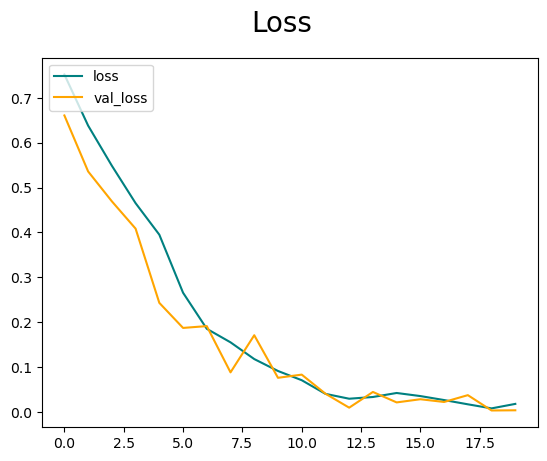

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

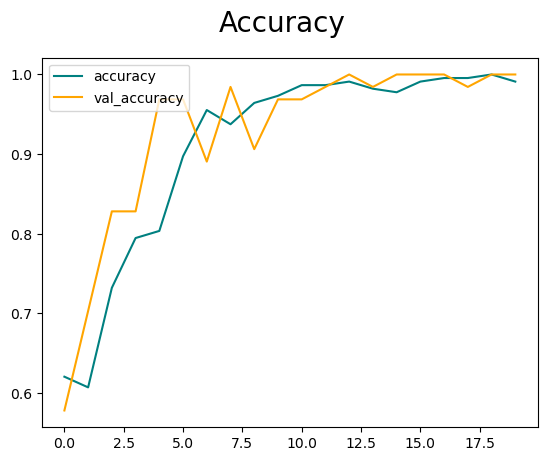

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9. Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 298ms/step


In [35]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## Test

In [5]:
import cv2

In [7]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'plt' is not defined

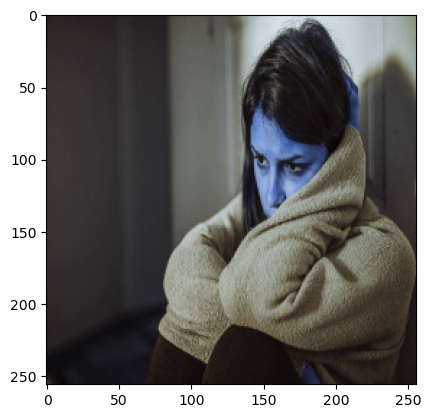

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


In [41]:
yhat

array([[0.8066681]], dtype=float32)

In [42]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


## Save the model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','happysadmodel.h5'))

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [47]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 194ms/step


In [48]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
